In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


## Risk Factors for Cervical Cancer 

## Summary of The Dataset
The dataset that I researched included 858 female patients and a number of factors that could contribute to an increased risk of developing cervical cancer.  I chose to focus on six of these factors including: age, smoking habits, use of hormonal contraceptives, number of pregnancies, and HPV diagnosis.  

My goal was to see if there was any positive correlation between one or multiple risk factors (of those mentioned above) and a positive cervical cancer diagnosis.  I have included information from previous studies to compare my results to and see if the information from this dataset lines up with current research findings.

 ## Data Research Information
 
 - AGE: Fifty percent of cervical cancer diagnoses occur in women ages 35 - 54, and about 20% occur in women over 65 years of age. The median age of diagnosis is 48 years. About 15% of women develop cervical cancer between the ages of 20 - 30. Cervical cancer is extremely rare in women younger than age 20. However, many young women become infected with multiple types of human papilloma virus, which then can increase their risk of getting cervical cancer in the future. Young women with early abnormal changes who do not have regular examinations are at high risk for localized cancer by the time they are age 40, and for invasive cancer by age 50. 
 
 
 

## Data Research Information Cont.

- USE OF  ORAL CONTRACEPTIVES: Studies have reported a strong association between cervical cancer and long-term use of oral contraception (OC). Women who take birth control pills for more than 5 - 10 years appear to have a much higher risk HPV infection (up to four times higher) than those who do not use OCs. (Women taking OCs for fewer than 5 years do not have a significantly higher risk.) The reasons for this risk from OC use are not entirely clear. Women who use OCs may be less likely to use a diaphragm, condoms, or other methods that offer some protection against sexual transmitted diseases, including HPV. Some research also suggests that the hormones in OCs might help the virus enter the genetic material of cervical cells. 

## Data Research Information Cont.

- HAVING MANY CHILDREN: Studies indicate that having many children increases the risk for developing cervical cancer, particularly in women infected with HPV. 
- SMOKING: Smoking is associated with a higher risk for precancerous changes (dysplasia) in the cervix and for progression to invasive cervical cancer, especially for women infected with HPV. 

     Research information obtained from <a href=https://www.kaggle.com/loveall/cervical-cancer-risk-classification>Kaggle   Cervical Cancer Risks Classification</a>
 

In [2]:
!git clone https://github.com/Lthom17/Cervical_Cancer_Risk_Factors

Cloning into 'Cervical_Cancer_Risk_Factors'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [3]:
#load data
data_path="kag_risk_factors_cervical_cancer.csv"
df_cc =pd.read_csv(data_path) 

df_cc.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
#replace all ? with NaN
df_cc = df_cc.replace('?', np.nan);

In [6]:
#explore missing data
missing = pd.DataFrame({'Missing': df_cc.isnull().sum()})
display(missing.sort_values(by='Missing', ascending=False))

,Missing
STDs: Time since last diagnosis,787
STDs: Time since first diagnosis,787
IUD,117
IUD (years),117
Hormonal Contraceptives,108
Hormonal Contraceptives (years),108
STDs:pelvic inflammatory disease,105
STDs:vulvo-perineal condylomatosis,105
STDs:HPV,105
STDs:Hepatitis B,105


In [7]:
#rename columns for ease of use and with better descriptions
df_cc = df_cc.rename(columns={'Smokes': 'smokes', 'Smokes (years)': 'smokes_years', 'Age': 'age', 'Hormonal Contraceptives': 'hormonal_contraceptives', 'Hormonal Contraceptives (years)': 'hormonal_contraceptives_years', 'Smokes (packs/year)': 'smokes_packs_per_year', 'Num of pregnancies': 'num_of_pregnancies'})

In [8]:
#drop columns that I will not be using
df_cc = df_cc.drop(['Number of sexual partners', 'First sexual intercourse',
        'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:CIN', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy' ], axis=1)
#test
df_cc.columns

Index(['age', 'num_of_pregnancies', 'smokes', 'smokes_years',
       'smokes_packs_per_year', 'hormonal_contraceptives',
       'hormonal_contraceptives_years', 'Dx:Cancer', 'Dx:HPV'],
      dtype='object')

In [9]:
#reset datatypes to numeric instead of strings
df_cc.smokes_years = df_cc.smokes_years.apply(pd.to_numeric)
df_cc.smokes = df_cc.smokes.apply(pd.to_numeric)
df_cc.smokes_packs_per_year = df_cc.smokes_packs_per_year.apply(pd.to_numeric)

In [10]:
#test
df_cc.describe()

,age,smokes,smokes_years,smokes_packs_per_year,Dx:Cancer,Dx:HPV
count,858.000000,845.000000,845.000000,845.000000,858.000000,858.000000
mean,26.820513,0.145562,1.219721,0.453144,0.020979,0.020979
std,8.497948,0.352876,4.089017,2.226610,0.143398,0.143398
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,1.000000,37.000000,37.000000,1.000000,1.000000


## Patients with Cervical Cancer Diagnosis
Of the 858 women included in this dataset, there are 18 women that have a positive diagnosis (yes) for cervical cancer and 840 that have a negative diagnosis (no).  Considering there is such a small number of women represented with a positive cervical cancer diagnosis, I would expect to not always see the significant differences mentioned in the research information in regards to cervical cancer diagnosis and the observed risk factors.  A larger dataset of patients would be recommended.

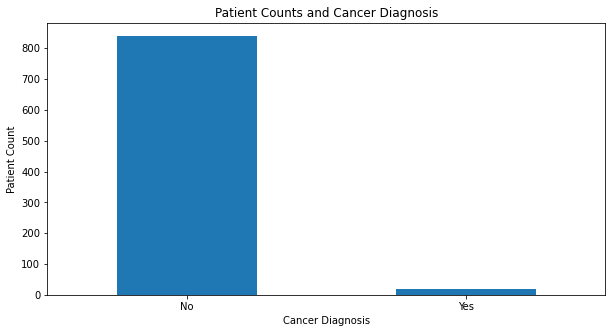

In [11]:
plt.figure(figsize=[10, 5])
df_cc['Dx:Cancer'].value_counts().plot(kind='bar');
plt.xticks(np.arange(2), ['No', 'Yes'], rotation=0) 
plt.ylabel('Patient Count')
plt.xlabel('Cancer Diagnosis');
plt.title('Patient Counts and Cancer Diagnosis');


## Distribution of Ages

The ages of the women in my dataset range from 13 years old to 84 years old.  The majority of the women in the dataset are 20-30 years old.

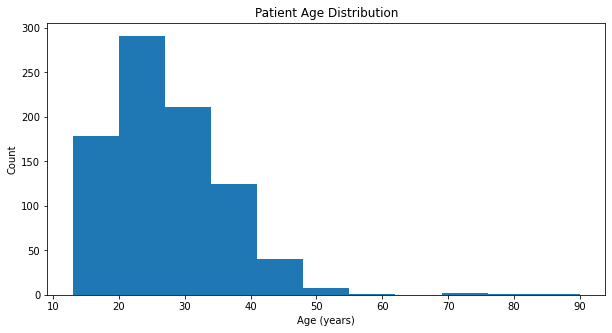

In [12]:
plt.figure(figsize=[10, 5])
bins = np.arange(13, 84 + 7, 7)
plt.hist(data= df_cc, x='age', bins = bins);
plt.ylabel('Count')
plt.xlabel('Age (years)');
plt.title('Patient Age Distribution');

In [13]:
#show max and min values for bin reference of smoked years
df_cc['smokes_years'] = df_cc['smokes_years'].apply(pd.to_numeric)
df_cc['smokes_years'].describe()

count    845.000000
mean       1.219721
std        4.089017
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: smokes_years, dtype: float64

## Distribution of Women Who Are Smokers and How Long They Have Smoked

The majority of women in my dataset do not smoke.  Those that do smoke the majority have smoked for less than 5 years.

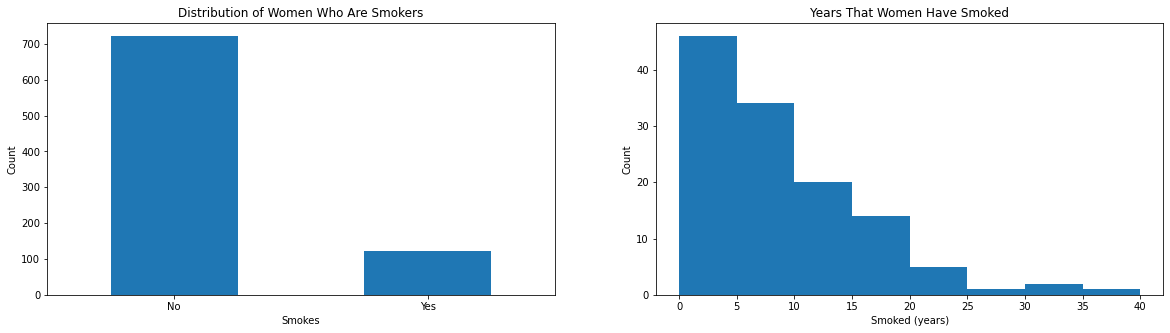

In [14]:
#set figure subplots size
fig, ax = plt.subplots(2,2,figsize=(20,5))
#plot count of smokers vs non smokers
plt.subplot(1,2,1)
df_cc['smokes'].value_counts().plot(kind='bar');
plt.ylabel('Count')
plt.xlabel('Smokes');
plt.xticks(np.arange(2), ['No', 'Yes'], rotation=0) 
plt.title('Distribution of Women Who Are Smokers');

#plot number of years smokers have smoked and counts
plt.subplot(1,2,2)
smokers = df_cc.query('smokes_years > 0.0')
bins = np.arange(0,smokers.smokes_years.max() + 5, 5 )
plt.hist(data = smokers, x='smokes_years', bins=bins)
plt.ylabel('Count')
plt.xlabel('Smoked (years)');
plt.title('Years That Women Have Smoked');


In [15]:
df_cc['hormonal_contraceptives'].unique(), df_cc['hormonal_contraceptives_years'].unique()

(array(['0.0', '1.0', nan], dtype=object),
 array(['0.0', '3.0', '15.0', '2.0', '8.0', '10.0', '5.0', '0.25', '7.0',
        '22.0', '19.0', '0.5', '1.0', '0.58', '9.0', '13.0', '11.0', '4.0',
        '12.0', '16.0', '0.33', nan, '0.16', '14.0', '0.08', '2.282200521',
        '0.66', '6.0', '1.5', '0.42', '0.67', '0.75', '2.5', '4.5', '6.5',
        '0.17', '20.0', '3.5', '0.41', '30.0', '17.0'], dtype=object))

In [16]:
#change datatype to numeric from string
df_cc['hormonal_contraceptives_years'] = df_cc['hormonal_contraceptives_years'].apply(pd.to_numeric)
#test
df_cc['hormonal_contraceptives_years'].dtype

dtype('float64')

## Women and Hormonal Contraceptive Use

In this dataset, approximately 2/3 of the women in the datset are using hormonal contraceptives.  A majority of the women in this dataset have been on hormonal contraceptives for less than 5 years.

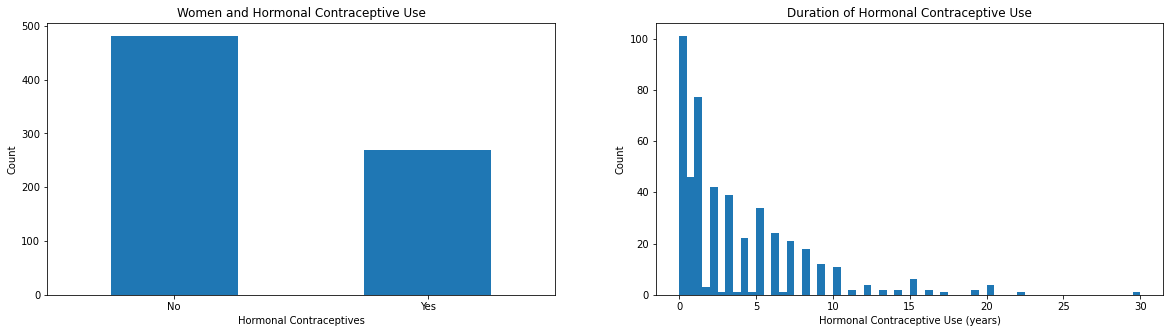

In [17]:
#hormonal contraceptives
fig, ax = plt.subplots(2,2,figsize=(20,5))
plt.subplot(1,2,1)
df_cc['hormonal_contraceptives'].value_counts().plot(kind='bar');
plt.xticks(np.arange(2), ['No', 'Yes'], rotation=0) 
plt.ylabel('Count')
plt.xlabel('Hormonal Contraceptives');
plt.title('Women and Hormonal Contraceptive Use');
#years taking hormonal contraceptives
plt.subplot(1,2,2)
hc_years = df_cc.query('hormonal_contraceptives_years > 0.0')
bins = np.arange(0,hc_years.hormonal_contraceptives_years.max() + .5, .5 )
plt.hist(data = hc_years, x='hormonal_contraceptives_years', bins=bins)
plt.ylabel('Count')
plt.xlabel('Hormonal Contraceptive Use (years)');
plt.title('Duration of Hormonal Contraceptive Use');

In [18]:
#change Dx:Cancer to dictionary so a categorical class can be created
cancer_dict = {0:'no', 1: 'yes'}
df_cc['Dx:Cancer'] = df_cc['Dx:Cancer'].map(cancer_dict)


## Bivariant Plots

In [19]:
#change Dx:Cancer to 'yes' or 'no' diagnosis 

diagnosis_classes = ['no','yes']

dx_classes = pd.api.types.CategoricalDtype(ordered=False, categories=diagnosis_classes)

df_cc['Dx:Cancer'] = df_cc['Dx:Cancer'].astype(dx_classes)


In [20]:
#test
df_cc['Dx:Cancer'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [21]:
#change age dtype to numeric
df_cc['age'] = df_cc['age'].apply(pd.to_numeric)
df_cc['age'].unique()
#test
df_cc.age.dtypes

dtype('int64')

## Age vs. Cancer Diagnosis

The majority of positive cervical cancer diagnosises happen between ages 20-40 with a median age of approx. 33 years old. There are no positive cervical cancer diagnosies for ages above ~63 years old for this dataset.

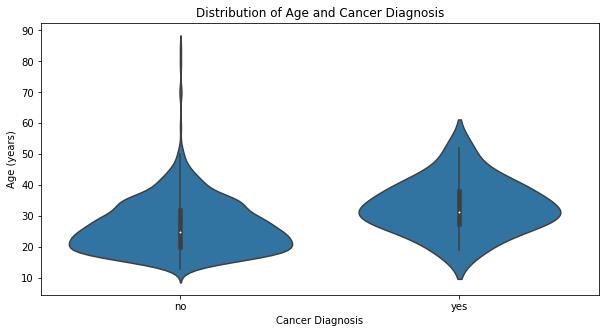

In [22]:
#violinplot of cancer diagnosis and age
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
sb.violinplot(x='Dx:Cancer', y='age', data = df_cc, color=base_color);
plt.ylabel('Age (years)')
plt.xlabel('Cancer Diagnosis');
plt.title('Distribution of Age and Cancer Diagnosis');

## Hormonal Contraceptive Use and Cancer

Women that had a positive or 'yes' cervical cancer diagnosis had been on hormonal contraceptives, on average, longer than those that have a 'no' diagnosis. The majority of women with a 'yes' cancer diagnosis have used hormonal contraceptives between 2-8 years.  There are many outliers in the negative cervical cancer diagnosis column in terms of higher number of years on hormonal contraceptives.  This suggests that there is more to the story than just length of time on hormonal contraceptives. 

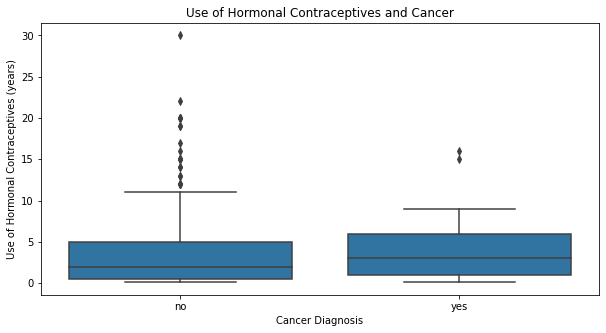

In [23]:
#hormonal contraceptive years and cervical cancer diagnosis
plt.figure(figsize=[10,5])
base_color = sb.color_palette()[0]
contra_years = df_cc.query('hormonal_contraceptives_years > 0.0') #get only those that are on hormonal contraceptives
sb.boxplot(x='Dx:Cancer', y='hormonal_contraceptives_years', data = contra_years, color=base_color);
plt.ylabel('Use of Hormonal Contraceptives (years)')
plt.xlabel('Cancer Diagnosis');
plt.title('Use of Hormonal Contraceptives and Cancer');

I can see on the boxplot on the right that those patients that had a positive or 'yes' cervical cancer diagnosis had been on hormonal contraceptives, on average, longer than those that have a 'no' diagnosis. It also shows that the 'yes' diagnosis is related to those patients on hormonal contraceptives for 0-8 years.  There are more outliers in the negative cervical cancer diagnosis column in terms of years on oral contraceptives.  This suggests that there is more to the story than just length of time on hormonal contraceptives.  

## Smoking and Cancer Diagnosis

Further exploration shows that there were only two people in the dataset that were smokers and had cervical cancer. It would be hard to say if there is a relationship between smoking and cervical cancer based on this dataset. As I investigated the information on the two individuals that had cancer, I could see that there was a lot of variation in their information. For example, the amount of packs they smoked in a year, age, number of pregnancies, etc. did not show a relation to each other. It is interesting to see that a large number of the women in this dataset are smokers and only two have cervical cancer. This is counterintuitive to what I was expecting to find. I feel that this dataset is too small for this particular questions and I feel that in order to get a better idea of if there is a relationship between smoking and cervical cancer I would need to look at a larger data set.  Given this information I would consider this a dead end for investigation of the smoking risk factor with the given data.



In [24]:
#find how many smokers have cancer
smoker = df_cc[df_cc['smokes' ] == 1.0]
smoker
smoke_cancer = smoker[smoker['Dx:Cancer'] == 'yes']
smoke_cancer

,age,num_of_pregnancies,smokes,smokes_years,smokes_packs_per_year,hormonal_contraceptives,hormonal_contraceptives_years,Dx:Cancer,Dx:HPV
3,52,4.0,1.0,37.0,37.00,1.0,3.0,yes,1
849,32,1.0,1.0,11.0,0.16,1.0,6.0,yes,1


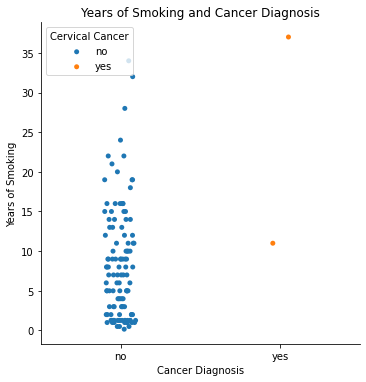

In [25]:
#plot years smokers have been smoking and cancer diagnosis
sb.catplot(x="Dx:Cancer", y="smokes_years", data= smoker);
plt.legend(['no', 'yes'], title="Cervical Cancer", loc='upper left');
plt.xlabel('Cancer Diagnosis')
plt.ylabel('Years of Smoking');
plt.title('Years of Smoking and Cancer Diagnosis');

According to this catplot there were only two people in the data set that were smokers and had cervical cancer.  It would be hard to say if there is a relationship between smoking and cervical cancer based on this dataset.  As I investigated the information on the two individuals that had cancer, I could see that there was a lot of variation in their information.  For example, the amount of packs they smoked in a year, age, number of pregnancies, etc. did not show a relation to each other.  It is interesting to see that a large number of the women in this dataset are smokers and only two have cervical cancer.  This is counterintuitive to what I was expecting to find.  I feel that this dataset is too small for this particular questions and I feel that in order to get a better idea of if there is a relationship between smoking and cervical cancer I would need to look at a larger data set.

In [26]:
#Explore number of pregnancies and cancer dx
df_cc.num_of_pregnancies = df_cc.num_of_pregnancies.apply(pd.to_numeric)
df_cc.num_of_pregnancies.describe()

count    802.000000
mean       2.275561
std        1.447414
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: num_of_pregnancies, dtype: float64

In [27]:
#filter all women with a positive cervical cancer diagnosis
cancer_dx = df_cc[df_cc['Dx:Cancer']=='yes']
cancer_dx

,age,num_of_pregnancies,smokes,smokes_years,smokes_packs_per_year,hormonal_contraceptives,hormonal_contraceptives_years,Dx:Cancer,Dx:HPV
3,52,4.0,1.0,37.0,37.00,1.0,3.00,yes,1
8,45,5.0,0.0,0.0,0.00,0.0,0.00,yes,1
23,40,2.0,0.0,0.0,0.00,1.0,15.00,yes,1
64,38,4.0,0.0,0.0,0.00,1.0,16.00,yes,1
188,27,2.0,0.0,0.0,0.00,1.0,3.00,yes,1
335,29,4.0,0.0,0.0,0.00,0.0,0.00,yes,1
432,31,1.0,0.0,0.0,0.00,0.0,0.00,yes,0
578,19,1.0,0.0,0.0,0.00,1.0,1.00,yes,1
610,21,3.0,0.0,0.0,0.00,0.0,0.00,yes,1
669,38,2.0,NaN,NaN,NaN,1.0,3.00,yes,1


In [28]:
size_of_grps = []
#loop through cancer_dx to get group sizes for donut chart
for i in range(int(cancer_dx.num_of_pregnancies.max() + 1)):
    size_of_grps.append(cancer_dx[cancer_dx['num_of_pregnancies'] == i].shape[0])
sum(size_of_grps)



18

## Number of Pregnancies for Women with Cervical Cancer
When considering all of the women in the dataset that had a positive cervical cancer diagnosis and their number of pregnancies, the data shows that there could be a positive relationship between number of pregnancies and cervical cancer risk.  Futhermore, the data shows a significant difference in whether or not a woman had ever been pregnant and her chances of a positive cervical cancer diagnosis. Women that had never been pregnant make up 0% of the whole of women with a positive cervical cancer diagnosis.



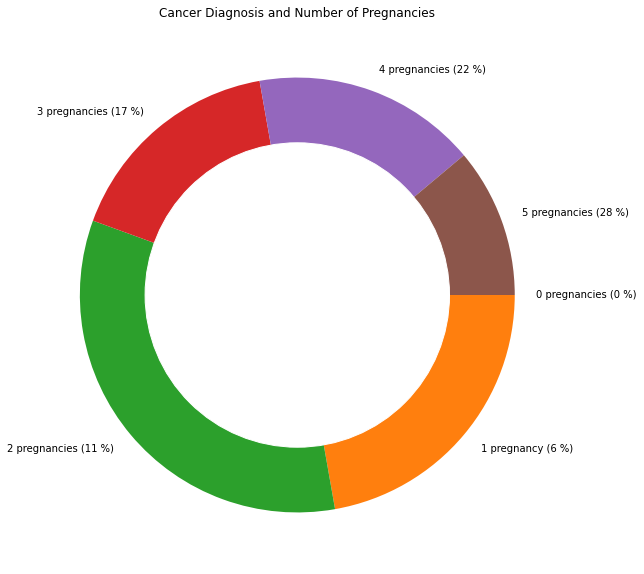

In [29]:
plt.figure(figsize=[10,10])
labels = []
#create labels for donut chart
for i in range(len(size_of_grps)):
    if i == 1:
        labels.append(str(i) + ' pregnancy ' + '(' + str(round(i/cancer_dx.shape[0] *100)) + ' %' + ')')
    else:
        labels.append(str(i) + ' pregnancies ' + '(' + str(round(i/cancer_dx.shape[0] *100)) + ' %' + ')')

# Create a pieplot
plt.pie(size_of_grps, labels = labels, counterclock=False)
plt.title('Cancer Diagnosis and Number of Pregnancies')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show(); 

This donut plot shows the parts of the whole relationship between number of preganancies and cancer diagnosis.  The donut plot shows all the indiviuals in the dataset that had a positive cervical cancer diagnosis and the number of pregnancies that they experienced.  It is hard to tell from this donut plot if the number of pregnancies is significant in leading to a positive cervical cancer diagnosis.  However, it does show that there could be a significant difference in whether or not a woman had ever been pregnant and her chances of a positive cervical cancer diagnosis. Women that had never been pregnant represent a very small fraction of the whole of women with a cervical cancer diagnosis. 

## Multivariante Plots

- age, number of preganancies, and cancer diagnosis
- smoking frequency, years on hormonal contraceptive, cancer diagnosis
- age, years on hormonal contraceptive, cancer diagnosis
-age, cancer dx, and HPV dx

## Age, Number of Pregnancies, and Cervical Cancer

In order to get a better picture of how the number of pregnancies may impact a woman's risk for cervical cancer,  I explored how age may affect the relationship between number of pregnancies and cervical cancer.  I wanted to see if number of pregnancies was simply an indicator of age or if the data showed a relationship regardless of age.
The scatter plot below shows similar information to that which I found in the donut plot in regards to number of pregnancies and cervical cancer. You can see that at 0 pregnancies there are no positive cervical cancer diagnosises.  However, it also shows very few negative diagnosises. We can see this trend continues regardless of age.  This could mean that there is a relation to the number of preganancies and cervical cancer or it could mean that women that had never been preganant were not tested.  This would makes sense as an HPV test is recommended when a woman is getting prenatal care. Finally, the data shows a positive correlation between age, number of pregnancies and cervical cancer between the ages of 19-53.

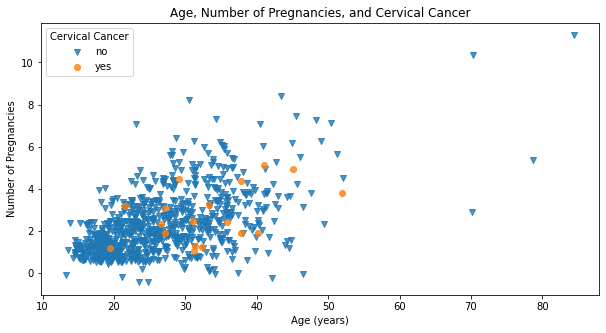

In [30]:
#age, number of preganancies, and cancer diagnosis
#set markers

cancer_markers = [['no', 'v'], ['yes', 'o']]
#set figure size and apply markers to data
plt.figure(figsize=[10,5]);
for ctype, marker in cancer_markers:
    plot_data = df_cc.loc[df_cc['Dx:Cancer'] == ctype] 
    sb.regplot(data=plot_data, x='age', y='num_of_pregnancies', y_jitter=0.5, x_jitter=0.5, fit_reg=False, marker=marker);

plt.legend(['no', 'yes'], title="Cervical Cancer");
plt.xlabel('Age (years)')
plt.ylabel('Number of Pregnancies');
plt.title('Age, Number of Pregnancies, and Cervical Cancer');

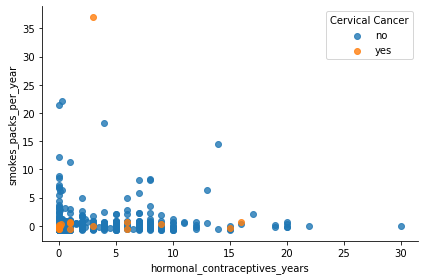

In [31]:
#Smoking frequency, years on hormonal contraceptive, cancer diagnosis
g = sb.FacetGrid(data=df_cc, hue='Dx:Cancer', hue_order=['no', 'yes'], height = 4, aspect=1.5)

g.map(sb.regplot, 'hormonal_contraceptives_years', 'smokes_packs_per_year', y_jitter = 0.8, fit_reg=False);

plt.legend(['no', 'yes'], title="Cervical Cancer");

The above plot shows the relationship between smoking frequency, hormonal contraceptives and cervical cancer.  The dataset only has two patients that are both smokers and have cervical cancer.  I can see that the two smokers with cervical cancer vary greatly in their smoking frequency and years on hormonal contraceptives.  Howeve, it would be  hard to say from this dataset if there is a relationship between smoking and cervical cancer given the low number of of patients that are positive for cervical cancer and also are smokers.  

## Age, Hormonal Contraceptive Use, and Cancer Diagnosis

The relationship between longevity of hormonal contraceptive use, age, and cervical cancer appears to have a positive relationship. There seems to be a greater number of women that use hormonal contraceptives and are positive of cervical cancer between the ages of 27-37. It is hard to tell if the longevity of hormonal contraceptive use has a major effect on a women's risk for cervical cancer but the data does show that any use of hormonal contraceptives combined with age could increase a woman;s risk of cervical cancer.

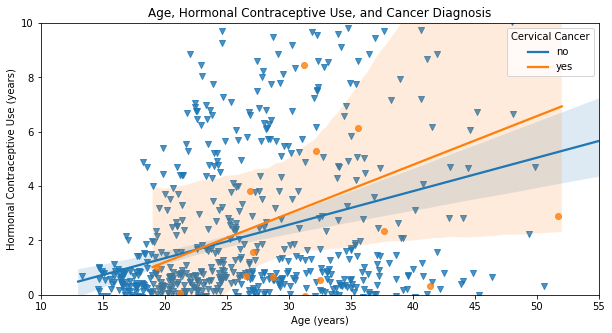

In [32]:
#age, years on hormonal contraceptive, cancer diagnosis
#set markers
cancer_markers = [['no', 'v'], ['yes', 'o']]
#set figure size and apply markers to data
plt.figure(figsize=[10,5]);
for ctype, marker in cancer_markers:
    plot_data = df_cc.loc[df_cc['Dx:Cancer'] == ctype] 
    sb.regplot(data=plot_data, x='age', y='hormonal_contraceptives_years',y_jitter=0.9, x_jitter=0.5, marker=marker);
#set limits on data to get a better picture of concentrated areas
plt.ylim((0,10))
plt.xlim((10, 55))

plt.legend(['no', 'yes'], title="Cervical Cancer");
plt.title('Age, Hormonal Contraceptive Use, and Cancer Diagnosis')
plt.xlabel('Age (years)')
plt.ylabel('Hormonal Contraceptive Use (years)');

The above plot shows the relationship between hormonal contraceptives, age, and cervical cancer.  I can see that there seems to be a greater number of patients between the ages of 15 - 35 that have a positive cancer diagnosis.  There seem to be more positive cancer diagnosises as you go up in hormonal contraceptive years.

## Positive for Cervical Cancer, Age, and HPV Diagnosis

To prepare the visual, I filtered the data for women that were positive for cervical cancer and then grouped them by age. I compared their HPV diagnosises to see if there was an uneven distribution between those that had a positive HPV diagnosis and those that were negative.  The results of the investigation show that a majority of the women from the dataset that were positive for cervical cancer were also positive for HPV. 

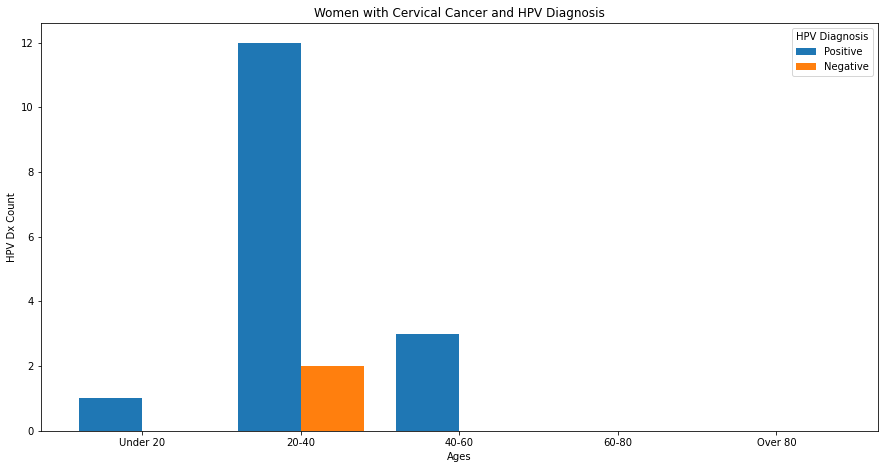

In [33]:
#get all who have cancer and their HPV Dx
pos_hpv_cancer =  df_cc[(df_cc['Dx:Cancer'] == 'yes') & (df_cc['Dx:HPV'] == 1)]
neg_hpv_cancer =  df_cc[(df_cc['Dx:Cancer'] == 'yes') & (df_cc['Dx:HPV'] == 0)]

#break into age groups
labels = ['Under 20', '20-40', '40-60', '60-80', 'Over 80']
bins = [0, 20, 40, 60, 80, 100]
plt.figure(figsize=[15,7.5])

#bins for age, positive for hpv, and cancer
age_bins1 = pd.cut(pos_hpv_cancer.age, bins=bins, include_lowest=True)
ax1 = age_bins1.value_counts().sort_index(ascending=True)
#bins for age, negative for hpv and cancer
age_bins2 = pd.cut(neg_hpv_cancer.age, bins=bins, include_lowest=True)
ax2 = age_bins2.value_counts().sort_index(ascending=True)

#set labels on x-axis
x_axis = np.arange(len(labels))
plt.bar(x_axis - 0.2, ax1, 0.4, label = 'Positive')
plt.bar(x_axis + 0.2, ax2, 0.4, label = 'Negative')

plt.xticks(x_axis, labels)
plt.xlabel("Ages")
plt.ylabel("HPV Dx Count")
plt.title("Women with Cervical Cancer and HPV Diagnosis")
plt.legend(title = 'HPV Diagnosis')
plt.show();

This bar chart shows that of the patients that had a positive cervical cancer diagnosis, most of them also had a positive HPV diagnosis.  

## Women with Cervical Cancer, Number of Pregnancies and HPV Diagnosis

In the beginning of this presentation there was information from research on a variety of risk factors for cervical cancer.  The information said that a woman's risk for cervical cancer went up significantly if she had a positive HPV diagnosis and numerous pregnancies. I explored the dataset to see if this data told the same story. I used a catplot to show the relation of the three variables. I placed the cervical cancer diagnosis on the x-axis and the number of pregnancies on the y-axis.  I then added a hue to signifiy if a woman was HPV positive (yes) or negative (no). I found that of the women that were positive for cervical cancer, all of them had at least one pregnancy and most were HPV positive.  All women who had more than one pregnancy and HPV positive had a positive cervical cancer diagnosis.

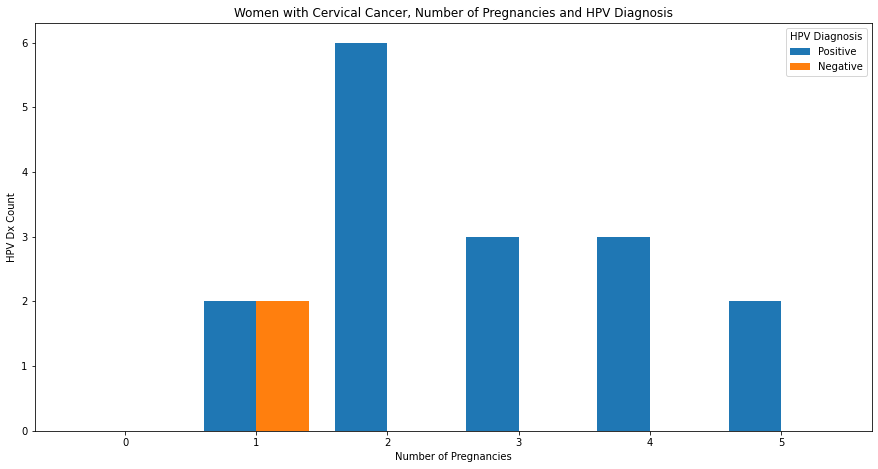

In [34]:
#get all who have cancer and their HPV Dx
pos_hpv_cancer =  df_cc[(df_cc['Dx:Cancer'] == 'yes') & (df_cc['Dx:HPV'] == 1)]
neg_hpv_cancer =  df_cc[(df_cc['Dx:Cancer'] == 'yes') & (df_cc['Dx:HPV'] == 0)]

#break into age groups
labels = ['0','1', '2', '3', '4', '5']
bins = np.arange(0, pos_hpv_cancer.num_of_pregnancies.max() + 1, .9)
plt.figure(figsize=[15,7.5])
#bins for number of pregnancies, positive for cancer and positive hpv
preg_bins1 = pd.cut(pos_hpv_cancer.num_of_pregnancies, bins=bins, include_lowest=True)
ax1 = preg_bins1.value_counts().sort_index(ascending=True)

#bins for number of pregnancies, positive for cancer and negative hpv
preg_bins2 = pd.cut(neg_hpv_cancer.num_of_pregnancies, bins=bins, include_lowest=True)
ax2 = preg_bins2.value_counts().sort_index(ascending=True)

x_axis = np.arange(len(labels))
plt.bar(x_axis - 0.2, ax1, 0.4, label = 'Positive')
plt.bar(x_axis + 0.2, ax2, 0.4, label = 'Negative')

plt.xticks(x_axis, labels)
plt.xlabel("Number of Pregnancies")
plt.ylabel("HPV Dx Count")
plt.title("Women with Cervical Cancer, Number of Pregnancies and HPV Diagnosis")
plt.legend(title = 'HPV Diagnosis')
plt.show();

In [35]:
df_cc['Dx:HPV'].unique()

array([0, 1])

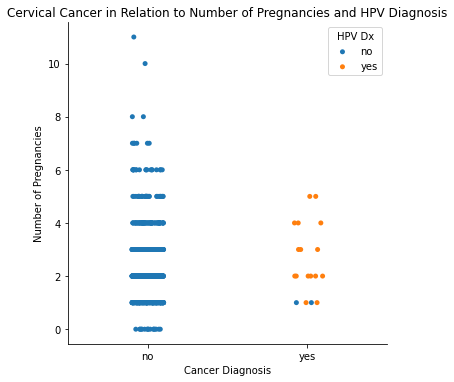

In [36]:
#plot years smokers have been smoking and cancer diagnosis

sb.catplot(x="Dx:Cancer", y="num_of_pregnancies", hue='Dx:HPV', legend=False, data= df_cc);
plt.legend(['no', 'yes'], title="HPV Dx")
plt.xlabel('Cancer Diagnosis')
plt.ylabel('Number of Pregnancies');
plt.title('Cervical Cancer in Relation to Number of Pregnancies and HPV Diagnosis');


In [ ]:
!jupyter nbconvert Cervical_Cancer_Risks_Part_Two.ipynb --to slides --post serve  --no-input --no-prompt 